In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
time = np.linspace(0, 1, 512)
def sinwave(amp, freq, time, phase=0):
  return amp * np.sin(freq*time + phase)

def coswave(amp, freq, time, phase=0):
  return amp * np.cos(freq*time + phase)

def Wavg(input):
  return input.sum()/input.size

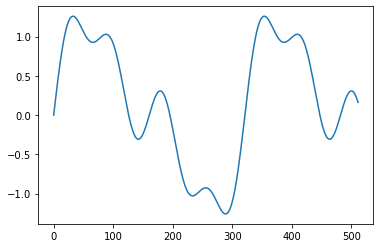

(512,)


In [4]:
w31 = sinwave(1, 10, time)
w32 = sinwave(0.5, 20, time)
w33 = sinwave(1/3, 40, time)
sample = w31+w32+w33
plt.plot(sample)
plt.show()
print(sample.shape)

In [5]:
filename = "bin/input.bin"
with open(filename, 'wb') as f:
    sample.tofile(f)

In [13]:
with open("bin/output.bin", "rb") as f:
    rectype = np.dtype(np.float32)
    res = np.fromfile(f, dtype=rectype)

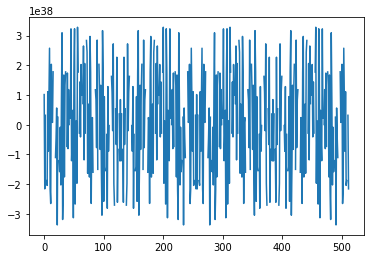

In [15]:
plt.plot(res[0::2])


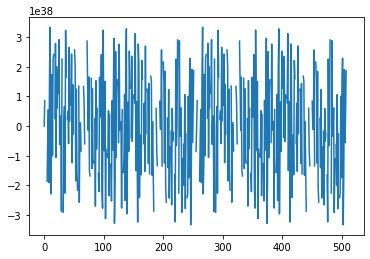

In [16]:
plt.plot(res[1::2])

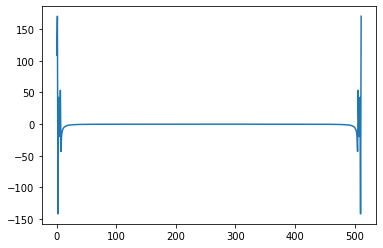

In [9]:
plt.plot(np.fft.fft(sample).real)